In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [32]:
L = 14
MCS = 200000
temp = 2.4
def import_data(filename, MCS,N):
    return np.fromfile(filename,dtype = np.int32).reshape(MCS,N)

def autocorr(data):
    magn = data.T - np.mean(data, axis = 1)
    fft_magn = fft(magn)
    fft_magn[0] = 0
    autocorr = ifft(np.abs(magn)**2)
    return np.real(autocorr.T)

    

In [33]:
configs = import_data(f"dataIsing2D_L{L}/config_L{L}_T{temp:.3f}.bin",MCS,L**2)

In [28]:
ac_data = autocorr(configs)

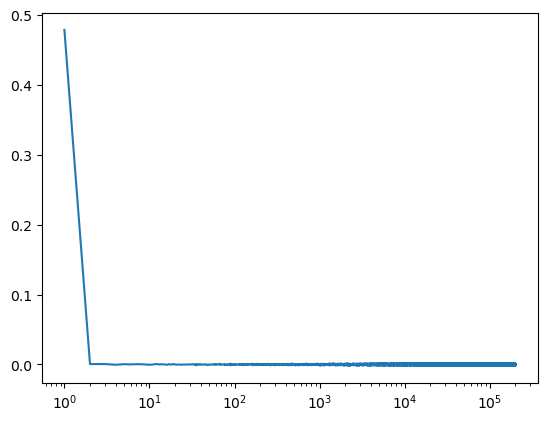

In [29]:
plt.plot([*range(1,1+MCS)],np.mean(ac_data,axis = 1))
plt.xscale("log")

(array([15311., 35465., 22191., 15185., 11656., 12334., 15125., 22187.,
        35378., 15168.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

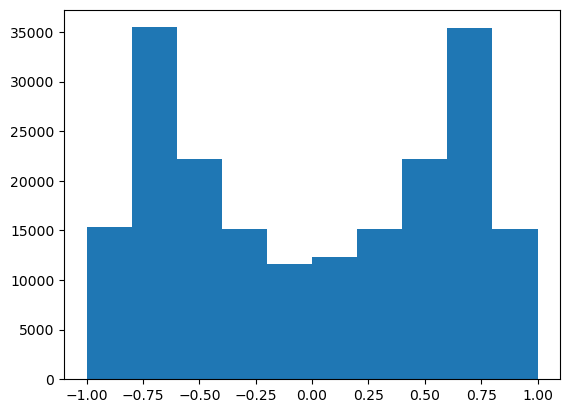

In [34]:
plt.hist(np.mean(configs,axis = 1))

Let's verify the critical properties

In [ ]:
def energy(data,L):
    